<style type="text/css">
.time_spent {
    width: 3em;
    border-style: none;
    background-color: silver;
    font-weight: bold;
    padding-left: 5px;
}
</style>

# Hochschule Bonn-Rhein-Sieg

# Mathematics for Robotics and Control, SS17

# Assignment 5 - Jacobians

In [1]:
try:
    shell = get_ipython()
    shell.enable_pylab("inline")
except NameError:
    pass

import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg
import sympy as sp

            
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
import IPython

### Jacobians

*This assignment will require some reading. Brace yourself. [Here](http://excelsior.cs.ucsb.edu/courses/cs290n_cg_modeling/notes/uiuc_notes/chap5.pdf) is a chapter which you may consider as an introduction to the topic.*

The following figure shows a robot arm with three rotational joints and two links:

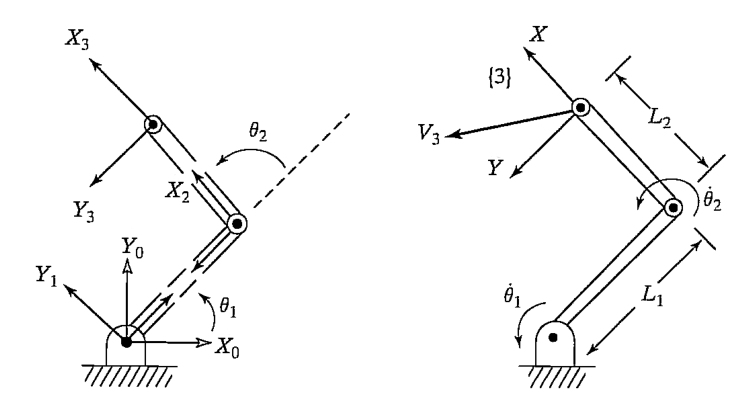

In [2]:
IPython.core.display.Image(r"images/robot_arm001.png")

The left part of the above figure shows four different frames attached to the arm of the robot, namely frames $0$, $1$, $2$, and $3$. $X_0$ and $Y_0$ describe the base frame, $Y_1$ is the unit vector pointing to the direction of the first link's $Y$ axis, $X_2$ denotes the direction of the second link's $X$ axis, and finally, $X_3$ and $Y_3$ specify the orientation of the end effector's frame, which you can assume to be fixed.

1. Specify the transformation matrices between frame 0 and frame 1, between frame 1 and frame 2, and finally the transformation between frame 2 and frame 3.

Assuming angular velocities are expressed using a common frame, they can be added as vectors. Now, given link number $i$, its velocity will be whatever the velocity of link $i-1$ was, plus whatever velocities were added by joint $i$. Another way to think of this is the following: before you can add the angular velocities, you have to transform one of the velocities to the coordinate frame of the other.

2. Specify the term to compute the angular velocity $\omega_i$ in terms of $\omega_{i-1}$ with respect to frame $i-1$. Remember that angular velocity is the derivative of a joint value $\theta$ with respect to a rotation axis.

3. Specify the Jacobian matrix that relates the velocity of the end effector relative to the joint angles of the robotic arm!

4. Does the Jacobian have an inverse? If so, is the matrix *always* invertible? What is the physical meaning of the matrix inverse?

5. Does the Jacobian always have full rank? How does the rank of the Jacobian affect the velocity mapping?

### Your solution

---
1. 
$$ 
T^{0}_1 = 		
\begin{bmatrix}
    cos(\theta_1) & -sin(\theta_1) & 0 & 0 \\
    sin(\theta_1)  & cos(\theta_1)  & 0 & 0 \\
    0			 &  0			&  1 & 0 \\
    0           & 0            & 0 & 1
\end{bmatrix}
$$
$$
T^{1}_2 = 	\begin{bmatrix}
    cos(\theta_2) & -sin(\theta_2) & 0 & L1 \\
    sin(\theta_2)  & cos(\theta_2)  & 0 & 0 \\
    0			 & 0				& 1 & 0 \\
    0           & 0            & 0 &  1
\end{bmatrix}
$$
$$
T^{2}_3 = 
\begin{bmatrix}
    1  & 0  & 0 & L2 \\
    0  & 1  & 0 & 0 \\
    0  & 0  & 1 & 0 \\
    0  & 0  & 0 & 1 
\end{bmatrix}
$$

2. 
$$\vec{\omega} = \frac{d\theta}{dt}.\vec{k}$$
$\vec{k}$ is the axis of rotation which in this case is $(0,0,1)^T$
To calculate $\omega_{i}$ in terms of $\omega_{i-1}$ we simply need to multiply it by the rotation matrix  $R^{i-1}_{i}$ before summing it with  $\omega_{i-1}$
$$ \omega^{i-1}_i = R^{i-1}_i . \frac{d\theta_{i}}{dt}.\vec{k} + \omega_{i-1} $$
In this case, since the rotation matrix is about the z-axis, the angular velocities can be summed without rotations.
$$
\begin{pmatrix}
   0\\
   0\\
   \omega^{1}_2
\end{pmatrix}=
\begin{pmatrix}
    cos(\theta_2) & -sin(\theta_2) &  0 \\
    sin(\theta_2)  & cos(\theta_2)  & 0  \\
    0			 & 0				& 1  \\
\end{pmatrix}
\begin{pmatrix}
   0\\
   0\\
   \omega_{2} 
\end{pmatrix}+
\begin{pmatrix}
   0\\
   0\\
   \omega_{1} 
\end{pmatrix}=
\begin{pmatrix}
   0\\
   0\\
   \omega_{1} + \omega_{2} 
\end{pmatrix}
$$

3.
$$
T^{0}_1 = 
\begin{bmatrix}
    cos(\theta_1) & -sin(\theta_1) & 0 &0 \\
    sin(\theta_1)  & cos(\theta_1)  & 0 & 0 \\
    0			 &  0			&  1 & 0 \\
    0           & 0            & 0 & 1
\end{bmatrix}
$$
$$ T^{0}_{2} = T^{0}_{1}.T^{1}_{2} $$
$$
T^{0}_{2} = 
\begin{bmatrix}
    c1c2-s1s2 & -c1s2-s1c2 & 0 &L1*c1 \\
    s1c2+c1s2  & -s1s2+c1c2  & 0 & L1*s1 \\
    0			 &  0			&  1 & 0 \\
    0           & 0            & 0 & 1
\end{bmatrix} 
$$
$$T^{0}_{3} = T^{0}_{2}.T^{2}_{3}$$
$$
T^{0}_{3} =  
\begin{bmatrix}
    c1c2-s1s2 & -c1s2-s1c2 & 0 &L2*(c1c2-s1s2) + L1*c1 \\
    s1c2+c1s2  & -s1s2+c1c2  & 0 & L2*(s1c2+c1s2) + L1*s1 \\
    0			 &  0			&  1 & 0 \\
    0           & 0            & 0 & 1
\end{bmatrix} 
$$
The lower half of the Jacobian (i.e. the angular jacobian) is given by 
$J_{\omega} = [\rho_1 z_0 ... \rho_n z_{n-1}]$
and $z^0_{i-1} = T^0_{i-1}k$ (pg 136, Eq 5.57 and Eq 5.58 of the included reference)
For example:
$$T^{0}_{2} = 
\begin{bmatrix}
    c1c2-s1s2 & -c1s2-s1c2 & 0 &L1*c1 \\
    s1c2+c1s2  & -s1s2+c1c2  & 0 & L1*s1 \\
    0			 &  0			&  1 & 0 \\
    0           & 0            & 0 & 1
\end{bmatrix} 
\begin{bmatrix}
    0\\
    0\\
    1\\
    1
\end{bmatrix} = 
\begin{bmatrix}
    0\\
    0\\
    1\\
    1
\end{bmatrix}
$$
(Only the first three rows are considered since the homogeneous transform matrix is being used)
Similarly, $z_1$ is also $$ \begin{bmatrix} 0\\0\\1 \end{bmatrix}$$
so $$ J_{\omega} = \begin{bmatrix} 0 & 0\\0 & 0\\1 & 1\end{bmatrix} $$
To calculate the linear velocity part of the Jacobian matrix, we can partially differentiate the translation part of 
$T^{0}_{3}$ with respect to $\theta_1$ and $\theta_2$.
$$\frac{\delta x}{\delta \theta_1} = -L1*s1 + L2(-s1c2 - c1s2) $$
$$ \frac{\delta x}{\delta \theta_2} = L2(-c1s2 - s1c2) $$
$$ \frac{\delta y}{\delta \theta_1} = L1*c1 + L2(c1c2 - s1s2)$$
$$ \frac{\delta y}{\delta \theta_2} = L2(-s1s2 + c1c2) $$
$$ \frac{\delta z}{\delta \theta_1} = 0 $$
$$ \frac{\delta z}{\delta \theta_2} = 0 $$
so $$J_v = 
\begin{bmatrix}
    -L1*s1 + L2(-s1c2 - c1s2) & L2(-c1s2 - s1c2) \\
    L1*c1 + L2(c1c2 - s1s2) & L2(-s1s2 + c1c2) \\
    0 & 0
\end{bmatrix}			
$$
Putting $J_{\omega}$ and $J_{v}$ together:
$$ J = 
\begin{bmatrix}
    -L1*s1 + L2(-s1c2 - c1s2) & L2(-c1s2 - s1c2) \\
    L1*c1 + L2(c1c2 - s1s2) & L2(-s1s2 + c1c2) \\
    0 & 0\\
    0 & 0\\
    0 & 0\\
    1 & 1\\
\end{bmatrix}
$$
4. No the Jacobian here doesn't have an inverse since it not square. However, the Moore-Penrose pseudo inverse can be calculated if required. It is always possible to find the pseudo-inverse of a matrix.
The inverse of a matrix is like taking the reciprocal of it. If you need to divide an expression by a matrix, you would instead multiply it by its inverse. In the case of the Jacobian here, the inverse Jacobian maps end-effector velocities to joint velocities, while the Jacobian maps joint velocities to end-effector velocities.
5. No, the Jacobian does not always have full rank (as is the case in the Jacobian just calculated).
If the Jacobian is not full rank it means the system is either over or under determined. In this case, it is under-determined since we have two joint velocities that can be controlled and three variables that need to be set 
$(v_{x},v_{y},\omega_{z})$. So it is not possible to fully specify the linear and angular velocity of the end effector with just the two joint velocities. 
If the system is overdetermined (for example, more joints than variables to be set), then a specific configuration of 
$(v_{x},v_{y},\omega_{z})$ can be achieved in a number of different set of joint velocities.


### Finding joint velocities for a given Cartesian velocity profile

For this assignment, you will have to use just the linear part of the Jacobian to derive joint velocities for a given Cartesian velocity of the end-effector

1. Specify the equations that relate the Cartesian positions ($x$,$y$) of the tip of link 1 and of the end-effector (the tip of link 2) to the configuration space variables ($\theta_1$ and $\theta_2$).
2. Use sympy to calculate the corresponding Jacobian which relates Cartesian velocities of the end-effector to the joint velocities.
3. Use $\theta_1 = \theta_2 = \frac{\pi}{4} \frac{rad}{s}$ as the starting position and set the required Cartesian velocities as: $\frac{dx}{dt} = 0.01 \frac{m}{s}$, $\frac{dy}{dt} = 0.0 \frac{m}{s}$. Assume a length of 1.0 m for both links.
4. Calculate joint velocities using the Jacobian and update the current joint angles.
5. Iterate 10 times and plot the positions of the two end-effectors and the links. Your output should look similar to the plot below.
6. Now increase the iterations to 50. Explain why the joints seem to jump around. At what point did that happen, and what can you say about the Jacobian at this point?

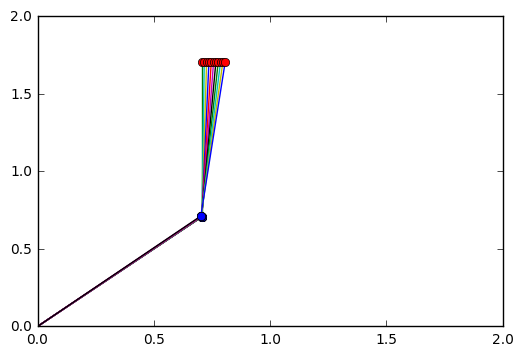

In [3]:
IPython.core.display.Image(r"images/joint_positions.png")

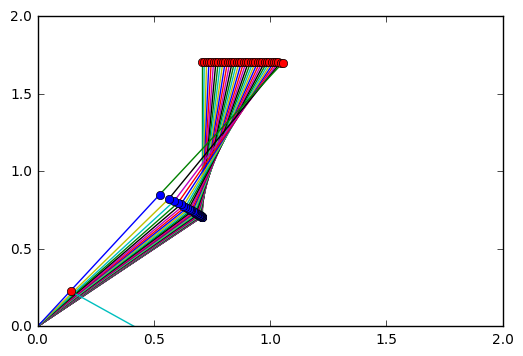

In [4]:
L1 = 1.0
L2 = 1.0
theta1, theta2 = sp.symbols('theta1, theta2')
# Equations for end-effector position (eq1 = x, eq2 = y)
eq1 = L1*sp.cos(theta1) + L2*sp.cos(theta1 + theta2)
eq2 = L1*sp.sin(theta1) + L2*sp.sin(theta1 + theta2)
# Equations for link 1 tip position (eq3 = x, eq4 = y)
eq3 = L1*sp.cos(theta1)
eq4 = L1*sp.sin(theta1)

# calculate symbolic Jacobian
X = sp.Matrix([eq1, eq2])
Y = sp.Matrix([theta1, theta2])
sym_jac = X.jacobian(Y)

# initial joint angles
theta1_initial = np.pi/4.0
theta2_initial = np.pi/4.0
cur_t1 = theta1_initial
cur_t2 = theta2_initial

# initial position of link 2
cur_l2_x = eq1.evalf(subs={theta1:cur_t1, theta2:cur_t2})
cur_l2_y = eq2.evalf(subs={theta1:cur_t1, theta2:cur_t2})

# initial position of link 1
cur_l1_x = eq3.evalf(subs={theta1:cur_t1})
cur_l1_y = eq4.evalf(subs={theta1:cur_t1})

# desired Cartesian velocity of link 2
req_vel = np.array([[0.01], [0.0]])

# store positions of link 1 and link 2
positions_l2 = []
positions_l1 = []
positions_l2.append([cur_l2_x, cur_l2_y])
positions_l1.append([cur_l1_x, cur_l1_y])

# plot the links
plt.plot([0, cur_l1_x], [0, cur_l1_y])
plt.plot([cur_l1_x, cur_l2_x], [cur_l1_y, cur_l2_y])

for i in xrange(36):
    # evaluate the Jacobian at the current joint angles
    jac_value = sym_jac.evalf(subs={theta1:cur_t1, theta2:cur_t2})
    # calculate angular velocity: dtheta = inv(Jac).dvel
    ang_vel = np.linalg.lstsq(jac_value, req_vel)[0]
    # update current joint angles
    cur_t1 += ang_vel[0]
    cur_t2 += ang_vel[1]

    # find updated Cartesian positions of both links
    cur_l2_x = eq1.evalf(subs={theta1:cur_t1, theta2:cur_t2})
    cur_l2_y = eq2.evalf(subs={theta1:cur_t1, theta2:cur_t2})
    
    cur_l1_x = eq3.evalf(subs={theta1:cur_t1})
    cur_l1_y = eq4.evalf(subs={theta1:cur_t1})
    
    # plot links
    positions_l2.append([cur_l2_x, cur_l2_y])
    positions_l1.append([cur_l1_x, cur_l1_y])
    plt.plot([0, cur_l1_x], [0, cur_l1_y])
    plt.plot([cur_l1_x, cur_l2_x], [cur_l1_y, cur_l2_y])

positions_l2 = np.array(positions_l2)
positions_l1 = np.array(positions_l1)
# plot tips of both links
plt.plot(positions_l2[:,0], positions_l2[:,1], 'ro')
plt.plot(positions_l1[:,0], positions_l1[:,1], 'bo')
plt.xlim([0,2])
plt.ylim([0,2])
plt.show()

Close to iteration 35, the value of $\theta_{2}$ becomes nearly zero. This is a point of singularity for the 2-link system. In this configuration, the system has only one degree of freedom (i.e. any instantaneous motion would be a radial motion, you cannot have an instantaneous motion in just $x$ or $y$). Hence, it is not able to achieve the required Cartesian velocity of $\frac{dx}{dt} = 0.01$ and $\frac{dy}{dt} = 0.0$. 

The Jacobian at this point evaluates to:
$$
\begin{bmatrix}
-1.69988408393756 & -0.848976880321710 \\
1.05374602170723 & 0.528429992221503
\end{bmatrix}
$$
The determinant of this is nearly zero, and hence the resulting velocities are not valid.